In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager as font_m
from matplotlib import rc

In [177]:
# 기본 폰트 설정

plt.rcParams['font.family'] = "AppleSDGothicNeoUL00"

In [172]:
# csv 읽기
df = pd.read_csv(r'data\1.csv', header=6, thousands=',', encoding='utf-8')
df = df.drop([0]) # 필요 없는 row 제거

needed_columns = df.columns.values[[1,2,7]]  # 필요한 column 값 찾아놓기

# 특정한 column값만 놔두고 데이터프레임 새로 만들기
new_df = df[needed_columns]

# 날짜를 object에서 datetime 타입으로 바꾸기
date_column = pd.to_datetime(new_df['개봉일'], format='%Y-%m-%d', errors='raise')
df.loc['개봉일'] = date_column

# 조건에 맞는 값만 남기기
mask = (df['개봉일'] > '2021-01-01') & (df['누적관객수 '] > 10000)
filtered_df = new_df.loc[mask]

# 필요한 값으로 열과 행이 뒤바뀐 데이터 프레임만들기
new_df = filtered_df.pivot(columns='영화명', values='누적관객수 ')
new_df = new_df.reset_index(drop=True)

# 확인
new_df

영화명,#아이엠히어,극장판 귀멸의 칼날: 무한열차편,나는 나를 해고하지 않는다,명탐정 코난: 진홍의 수학여행,미스터 존스,블라인드,빅풋 주니어2: 패밀리가 떴다,세자매,소울,아이 엠 우먼,커넥트
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,874999.0,NaN,NaN
1,NaN,206309.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42301.0,NaN,NaN,NaN
3,NaN,NaN,NaN,38131.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22918.0,NaN
5,NaN,NaN,NaN,NaN,NaN,18297.0,NaN,NaN,NaN,NaN,NaN
6,16290.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,14682.0,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14140.0
9,NaN,NaN,NaN,NaN,10743.0,NaN,NaN,NaN,NaN,NaN,NaN


In [173]:
def ReplaceValue(data, time) :
    """ 값을 모두 맨 아래로 보낸 뒤에 NaN을 보간하는 함수이다. 
    data에는 위에서 정제된 DataFrame이 들어가고, time에는 이 값으로 만들
    동영상의 시간이 들어간다. """
    
    data_copy = data.copy() # copy를 안하면 원본 데이터가 손상된다.
    column_value_list = list(data_copy.columns.values)
    frames = 30
    
    # 마지막줄 Replace
    for c_value in column_value_list :
        last_valid_index = data_copy[c_value].last_valid_index() 
        last_valid_value = data_copy[c_value][last_valid_index]
        last_index = time * frames - 1
        
        #replace 
        data_copy.loc[last_index, c_value] = data_copy.loc[last_valid_index, c_value]
    
    # np.nan 모두 제거
    data_copy = data_copy.dropna()
    
    # 데이터프레임을 내가 원하는 만큼 늘리기
    data_copy = data_copy.reindex(range(time * frames))
    
    # 첫번째 줄 모두 0 으로 만들기
    data_copy.loc[0] = 0
    
    # 보간
    data_copy = data_copy.interpolate()
    
    return data_copy
    

In [174]:
filtered_df = ReplaceValue(new_df, 10)

# 랭킹 설정

In [243]:
Rank_Series

영화명
#아이엠히어                7.0
극장판 귀멸의 칼날: 무한열차편     2.0
나는 나를 해고하지 않는다       11.0
명탐정 코난: 진홍의 수학여행      4.0
미스터 존스               10.0
블라인드                  6.0
빅풋 주니어2: 패밀리가 떴다      8.0
세자매                   3.0
소울                    1.0
아이 엠 우먼               5.0
커넥트                   9.0
Name: 2999, dtype: float64

In [246]:
# 랭킹 데이터프레임 만들기

test = pd.DataFrame({'foo' : [1,2,3], 'bar': [4,5,6], 'tar' : [7,8,9]})
test

,foo,bar,tar
0,1,4,7
1,2,5,8
2,3,6,9


In [264]:
rank_df = pd.DataFrame(Rank_Series)

index_array = rank_df.index.values
value_array = rank_df[2999]

In [294]:
# 모양 맞추기 어렵네...
np.random.rand(1,11)

array([[0.6473742 , 0.81433276, 0.7008453 , 0.79679282, 0.31103923,
        0.39313899, 0.70185902, 0.58111269, 0.96750907, 0.16756171,
        0.3628766 ]])

In [359]:
np.array([[1,2],[3,4]])

array([[1, 2],
       [3, 4]])

In [360]:
testo = np.array([1,2])  
testo.shape # 단일 행렬 1,2

(2,)

In [361]:
test1 = np.array([[1,2]])

In [385]:
test1[0][1] #1행 2열 

2

In [342]:
test2 = np.array([[1,], [2,]])

In [383]:
test2[0][0]

1

In [329]:
index_array.shape

(11,)

In [319]:
[list(value_array)]

[[7.0, 2.0, 11.0, 4.0, 10.0, 6.0, 8.0, 3.0, 1.0, 5.0, 9.0]]

In [326]:
rank_df = pd.DataFrame(np.array(this), columns=index_array)
rank_df

,#아이엠히어,극장판 귀멸의 칼날: 무한열차편,나는 나를 해고하지 않는다,명탐정 코난: 진홍의 수학여행,미스터 존스,블라인드,빅풋 주니어2: 패밀리가 떴다,세자매,소울,아이 엠 우먼,커넥트
0,7.0,2.0,11.0,4.0,10.0,6.0,8.0,3.0,1.0,5.0,9.0


In [272]:
rank_df.last_valid_index

<bound method NDFrame.last_valid_index of Empty DataFrame
Columns: [#아이엠히어, 극장판 귀멸의 칼날: 무한열차편, 나는 나를 해고하지 않는다, 명탐정 코난: 진홍의 수학여행, 미스터 존스, 블라인드, 빅풋 주니어2: 패밀리가 떴다, 세자매, 소울, 아이 엠 우먼, 커넥트]
Index: []>

In [183]:
endpoint = filtered_df.iloc[filtered_df.last_valid_index()]
endpoint

영화명
#아이엠히어                16290.0
극장판 귀멸의 칼날: 무한열차편    206309.0
나는 나를 해고하지 않는다        10318.0
명탐정 코난: 진홍의 수학여행      38131.0
미스터 존스                10743.0
블라인드                  18297.0
빅풋 주니어2: 패밀리가 떴다      14682.0
세자매                   42301.0
소울                   874999.0
아이 엠 우먼               22918.0
커넥트                   14140.0
Name: 299, dtype: float64

In [126]:
Rank_Series = endpoint.rank(ascending=False)

In [127]:
filtered_df.iloc[filtered_df.last_valid_index()].rank()

영화명
#아이엠히어                7.0
극장판 귀멸의 칼날: 무한열차편     2.0
나는 나를 해고하지 않는다       11.0
명탐정 코난: 진홍의 수학여행      4.0
미스터 존스               10.0
블라인드                  6.0
빅풋 주니어2: 패밀리가 떴다      8.0
세자매                   3.0
소울                    1.0
아이 엠 우먼               5.0
커넥트                   9.0
Name: 2999, dtype: float64

# teste


In [148]:
fontlist = font_m.findSystemFonts()

for font in fontlist :
    font_m.get_font(font)

In [175]:
colors =  plt.cm.Paired(range(10), alpha=0.8)

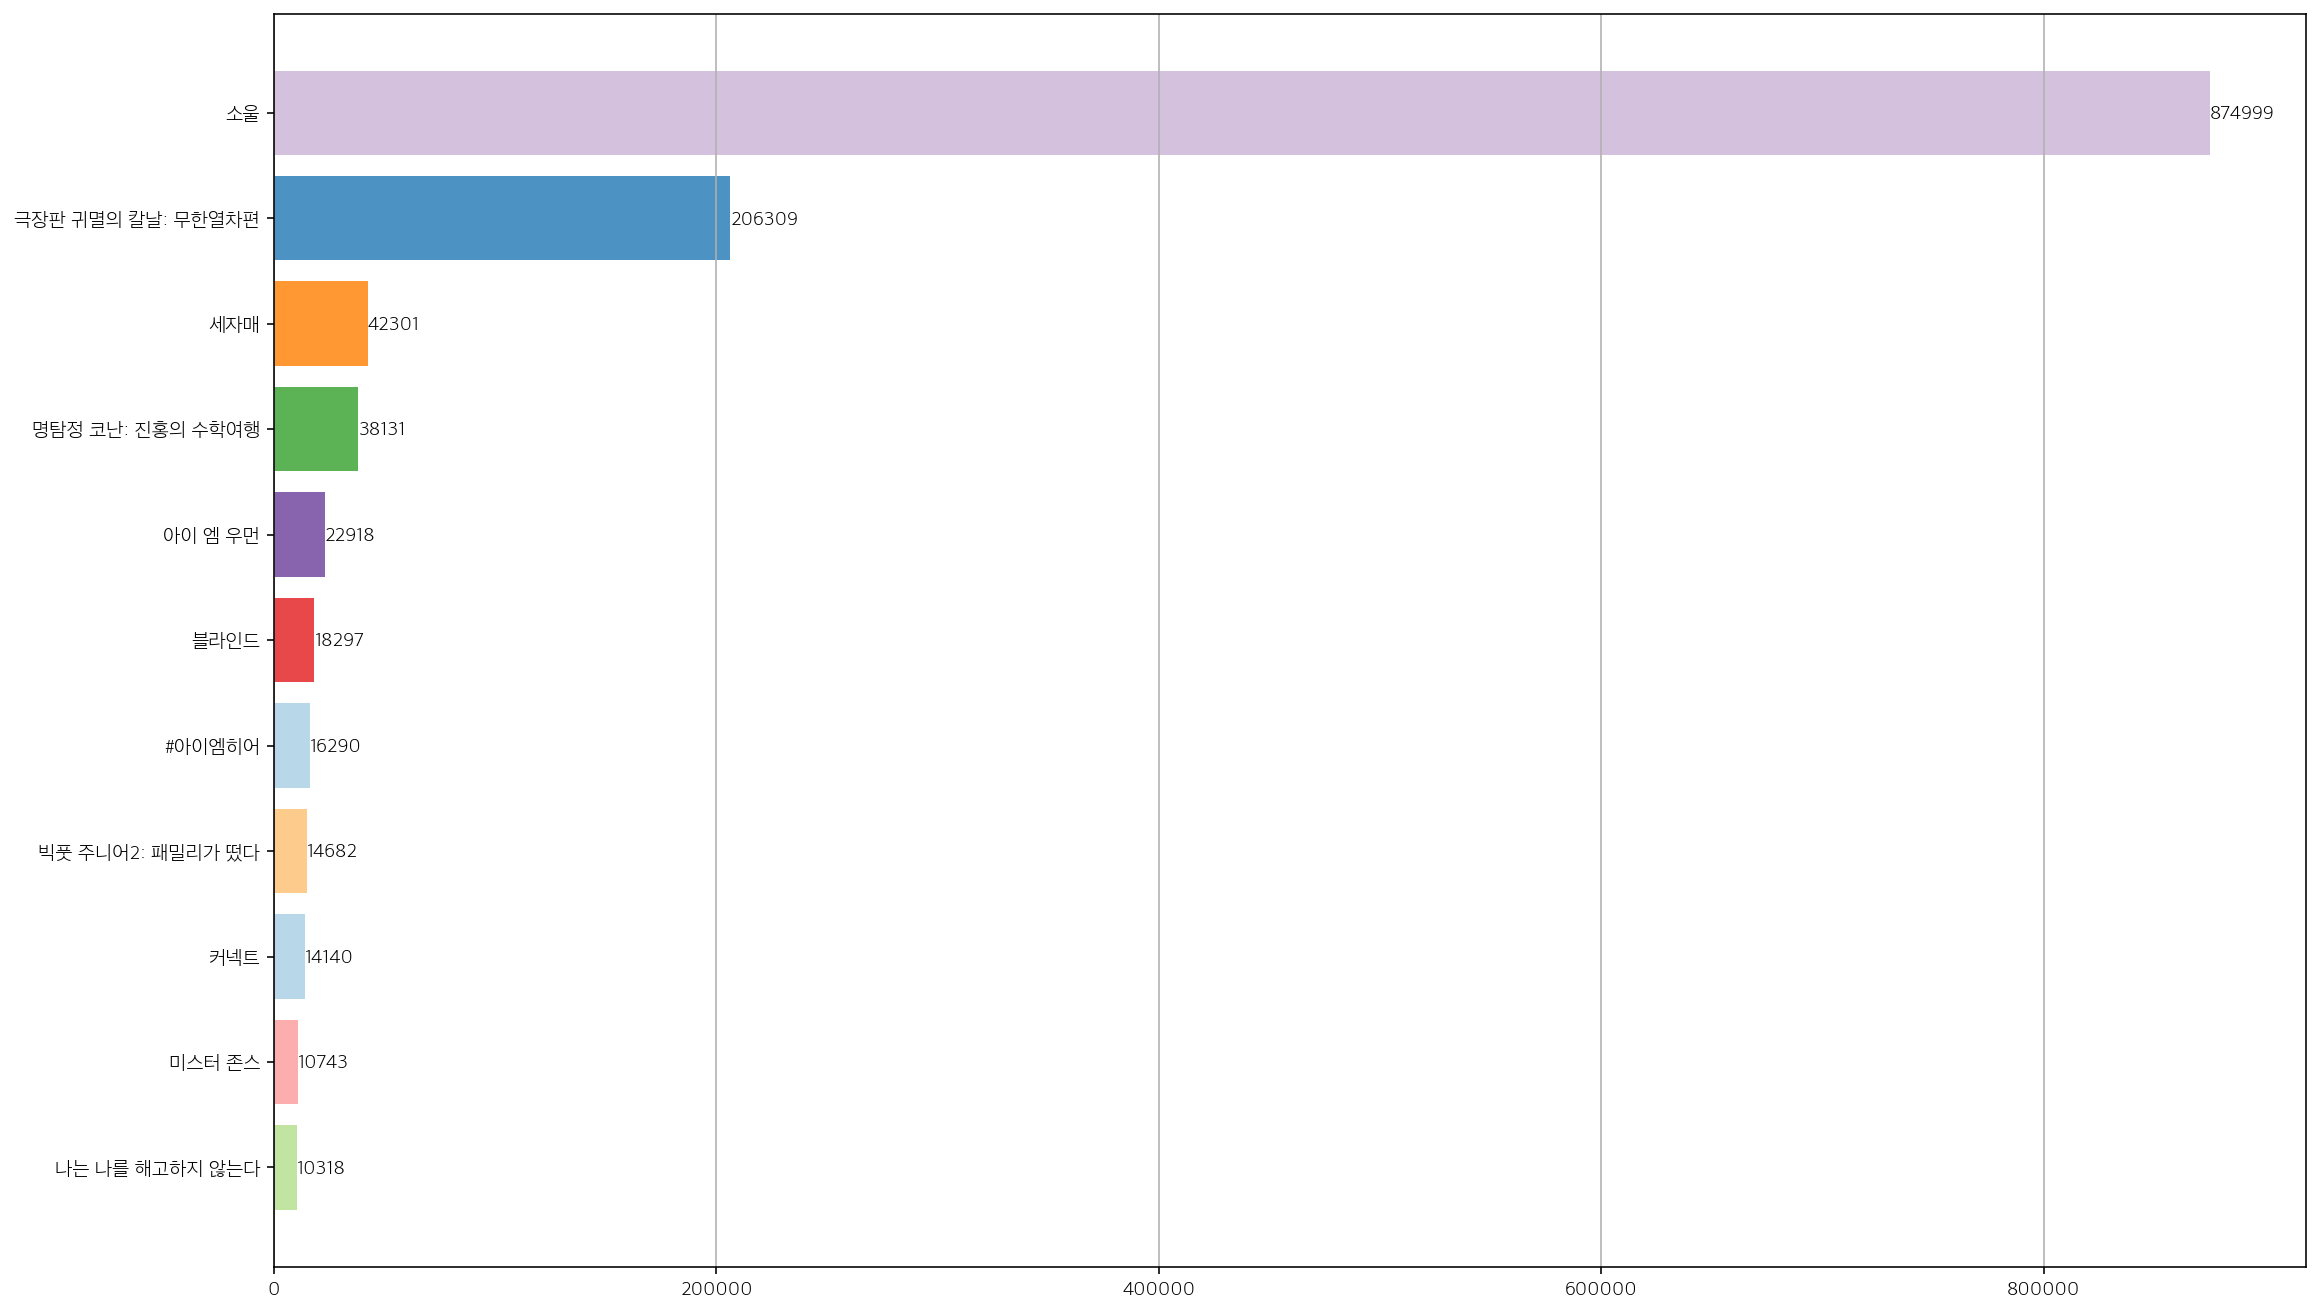

In [178]:
fig, ax = plt.subplots(figsize=(16,9), dpi=144, constrained_layout=True)

barh = ax.barh(Rank_Series, endpoint, tick_label=Rank_Series.index.values, color=colors)
ax.bar_label(barh)
ax.invert_yaxis()
ax.grid(visible=True, which='major', axis='x')

